# NHS: Analysis & Insights

## LSE Career Accelerator, Course 2

### Asaf Rubin | 20 February 2023

Private GitHub repository: https://github.com/AsafRubin00/Rubin_Asaf_DA201_Assignment

## Background

The NHS incurs significant, potentially avoidable, costs when patients miss general practitioner (GP) appointments. Reducing or eliminating missed appointments would be beneficial financially as well as socially. The government needs a data-informed approach to deciding how best to handle this problem. 

The NHS has posed two main question:

- Has there been adequate staff and capacity in the networks?
- What was the actual utilisation of resources?

## Preparing the workstation

Importing the necessary libraries and data sets

In [1]:
# Import the necessary libraries. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the three data sets.

# Load the data set: actual_duration.
ad = pd.read_csv('actual_duration.csv')

# Load the data set: appointments_regional.
ar = pd.read_csv('appointments_regional.csv')

# Load the data set: national_categories.
nc = pd.read_excel('national_categories.xlsx')

## Descriptive Analysis

In [3]:
# Sense check the data.

print(ad.columns)
print (ar.columns)
print (nc.columns)

Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')


In [4]:
# Determine descriptive statistics.

ad.describe()
ad.info()

ar.describe()
ar.info()

nc.describe()
nc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       59

### Answering a few exploratory questions

In [5]:
# How many locations are there in the data set?
print("Count of locations:", len(ad['sub_icb_location_name'].unique()))

Count of locations: 106


In [6]:
# What are the five locations with the highest number of records?
ad['sub_icb_location_name'].value_counts(ascending=False).nlargest(20)

NHS Norfolk and Waveney ICB - 26A                       1484
NHS Kent and Medway ICB - 91Q                           1484
NHS North West London ICB - W2U3Z                       1484
NHS Bedfordshire Luton and Milton Keynes ICB - M1J4Y    1484
NHS Greater Manchester ICB - 14L                        1484
NHS North East London ICB - A3A8R                       1484
NHS Devon ICB - 15N                                     1483
NHS Sussex ICB - 09D                                    1483
NHS West Yorkshire ICB - 15F                            1482
NHS Black Country ICB - D2P2L                           1480
NHS Birmingham and Solihull ICB - 15E                   1477
NHS Cheshire and Merseyside ICB - 12F                   1476
NHS Cambridgeshire and Peterborough ICB - 06H           1471
NHS North East and North Cumbria ICB - 84H              1471
NHS Humber and North Yorkshire ICB - 03F                1469
NHS Suffolk and North East Essex ICB - 06T              1469
NHS Lancashire and South

In [7]:
#How many service settings, context types, national categories, and appointment statuses are there?

# Count the number of service settings.
print(nc['service_setting'].value_counts())

# Count the number of national categories.
print(nc['national_category'].value_counts())

# Count the number of appointment statuses.
print(ar['appointment_status'].value_counts())

General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: service_setting, dtype: int64
Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation external to the practice              43095
Home Visit                                                             41850
Unplanned Clinical Activity                                            40415
Patient contac

In [8]:
# Between what dates were appointments scheduled?

# View the columns in the National Categories data.
nc.columns

# Determine the first and last date of scheduled appointments for each dataframe. 

# First, change the date format to datetime64.
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'], format='%Y-%m-%d')

# Print the max.
nc['appointment_date'].max()

Timestamp('2022-06-30 00:00:00')

In [9]:
# Print the min.
nc['appointment_date'].min()

Timestamp('2021-08-01 00:00:00')

In [10]:
# Which service setting reported the most appointments in North West London from 1 January to 1 June 2022?

# Create a subset.
nc_subset = nc.loc[nc['sub_icb_location_name']=='NHS North West London ICB - W2U3Z']
nc_subset

# Filter the subset to the relevent dates.
nc_2 = nc_subset.loc[(nc_subset['appointment_date'] >= '2020-01-01') & (nc_subset['appointment_date'] <'2022-06-30')]
nc_2

# print the value counts of the service settings in the filtered date.
print(nc_2['service_setting'].value_counts())

General Practice             4593
Other                        2846
Primary Care Network         2780
Extended Access Provision    2407
Unmapped                      333
Name: service_setting, dtype: int64


In [11]:
#Which month had the highest number of appointments?

month_count = nc.groupby('appointment_month')
month_count.agg({'count_of_appointments': ['sum', 'max']})\
.sort_values(by=('count_of_appointments', 'sum'), ascending=False)

count_of_appointments       
                                    sum    max
appointment_month                             
2021-11                        30405070  16368
2021-10                        30303834  16495
2022-03                        29595038  16116
2021-09                        28522501  15926
2022-05                        27495508  16590
2022-06                        25828078  16333
2022-01                        25635474  15784
2022-02                        25355260  16283
2021-12                        25140776  15405
2022-04                        23913060  15741
2021-08                        23852171  13592

In [12]:
# What was the total number of records per month?

month_count = nc.groupby('appointment_month')
nc['appointment_month'].value_counts()

2022-03    82822
2021-11    77652
2022-05    77425
2021-09    74922
2022-06    74168
2021-10    74078
2021-12    72651
2022-01    71896
2022-02    71769
2022-04    70012
2021-08    69999
Name: appointment_month, dtype: int64

In [13]:
# Calculate the mean number of appointments per month.

nc['appointment_month'].value_counts().mean()


74308.54545454546

## Visualising the Data

In [14]:
# Standardise the plot visualisations

# # Colour pallete to make charts look better.
blue, = sns.color_palette("muted", 1) 

# Darkgrid, white grid, dark, white and ticks.
sns.set_style('whitegrid') 

# Font size of the axes title.
plt.rc('axes', titlesize=18) 

# Font size of the x and y labels.
plt.rc('axes', labelsize=14)    

# Font size of the tick labels.
plt.rc('xtick', labelsize=13,color='#4f4e4e') 

# Font size of the tick labels.
plt.rc('ytick', labelsize=13,color='#4f4e4e')  

# Legend font size.
plt.rc('legend', fontsize=13)

# Controls default text sizes.
plt.rc('font', size=13) 

### Visualisation, Part I: Regional appointments from August to June

In [15]:
# Consider the appointments_regional (ar) data to figure out if the NHS start looking at increasing staff levels. 

# View the first five rows
ar.head()

# Print the min and max dates
print(ar['appointment_month'].max())
print(ar['appointment_month'].min())

# Filter the data to only look at the data from 2021-08 onwards
ar = ar[(ar['appointment_month'] >= "2021-08") & (ar['appointment_month']<= "2022-06")]
ar

2022-06
2020-01


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [16]:
#Create a new DataFrame from appointments_regional.

ar_agg = ar[['appointment_month', 'appointment_status', 'hcp_type', 'appointment_mode', \
             'time_between_book_and_appointment','count_of_appointments']]

ar_agg.head()

,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,2021-08,Attended,GP,Face-to-Face,1 Day,6553
3653,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961


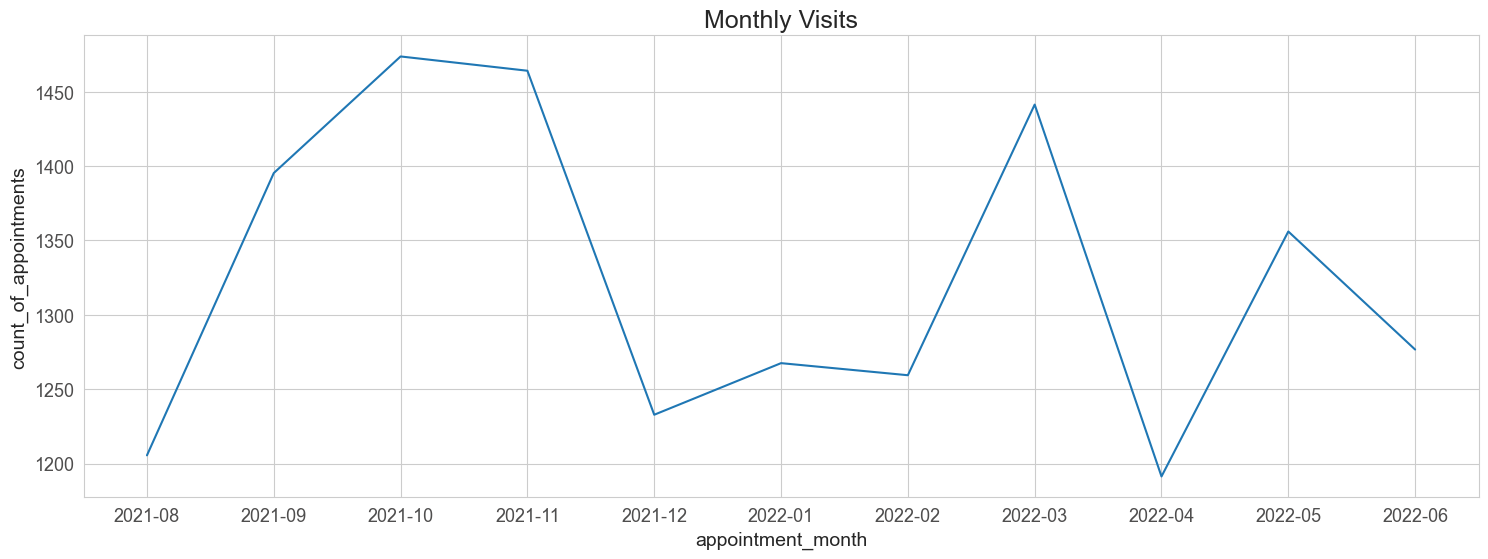

In [17]:
# Enlarge the plot size.
plt.figure(figsize=(18, 6))

# Create a lineplot indicating the number of monthly visits.
sns.lineplot(x='appointment_month', y = 'count_of_appointments', data=ar_agg, ci=None).set_title('Monthly Visits')

# Save the plot
plt.savefig('monthly_visits.png')

In [18]:
# Determine average utilisation of services.

# Create a new DataFrame.
ar_df = ar_agg.groupby('appointment_month').sum().reset_index()

# Create a new column to indicate average utilisation of service per month (count_of_appointments/30 days)
ar_df['utilisation'] = ar_df['count_of_appointments']/30

# Round the values to one decimal place.
ar_df.round(decimals = 1)

,appointment_month,count_of_appointments,utilisation
0,2021-08,23852171,795072.4
1,2021-09,28522501,950750.0
2,2021-10,30303834,1010127.8
3,2021-11,30405070,1013502.3
4,2021-12,25140776,838025.9
5,2022-01,25635474,854515.8
6,2022-02,25355260,845175.3
7,2022-03,29595038,986501.3
8,2022-04,23913060,797102.0
9,2022-05,27495508,916516.9


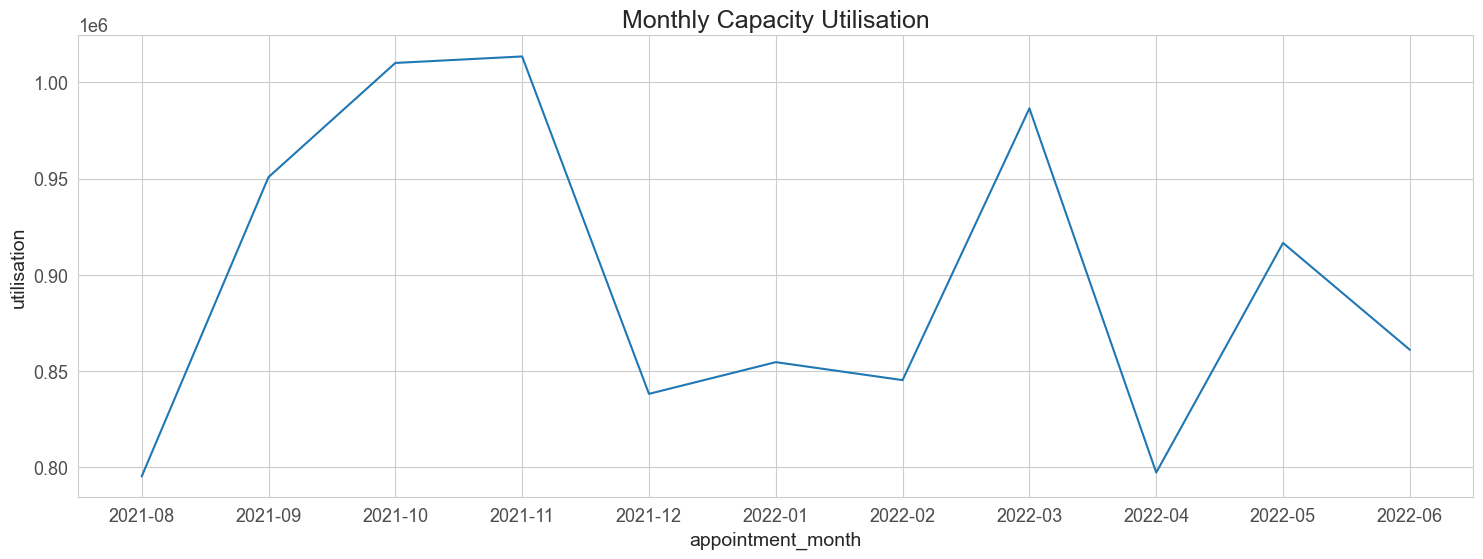

In [19]:
# Create a lineplot indicating the monthly capacity utilisation

# Enlarge the plot size.
plt.figure(figsize=(18, 6))

# Plot the data.
sns.lineplot(x = 'appointment_month', y='utilisation', data=ar_df).set_title('Monthly Capacity Utilisation')

# Save the plot
plt.savefig('monthly_capacity_utilisation.png')

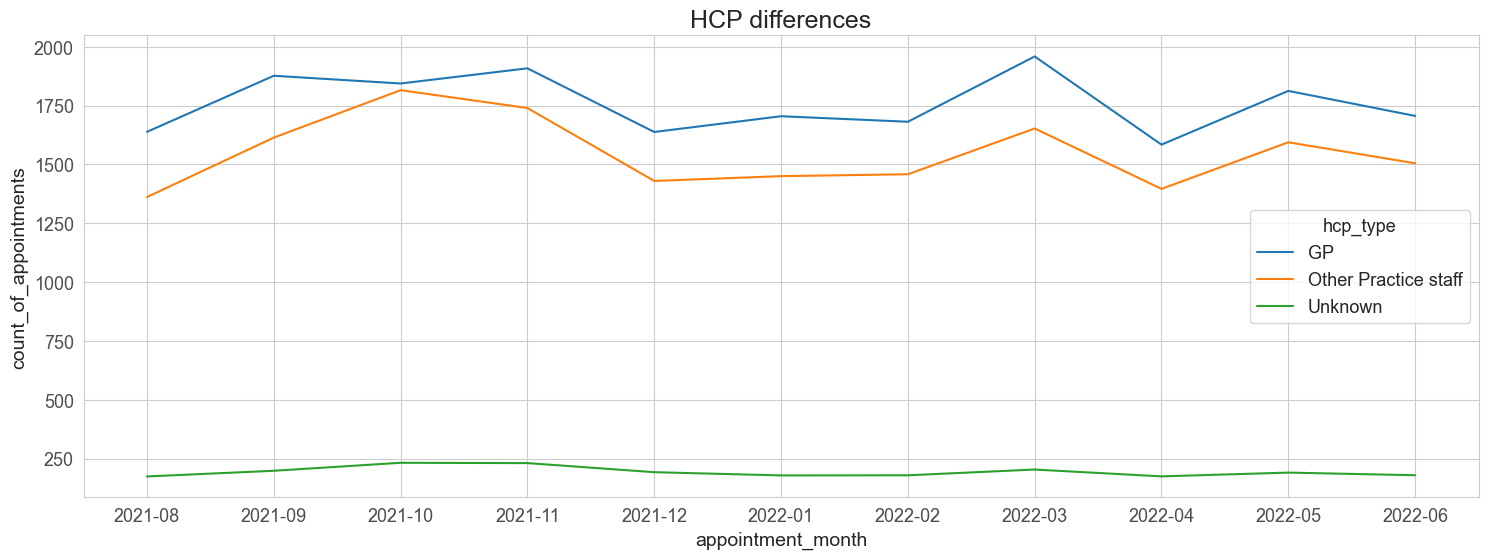

In [20]:
# Additional exploration of monthly capacity utilisation

# How do the healthcare professional (HCP) types differ over time?

# Enlarge the plot size.
plt.figure(figsize=(18, 6))

# Plot the data. 
sns.lineplot(x='appointment_month', y ='count_of_appointments', \
             hue='hcp_type', data=ar_agg, ci=None).set_title('HCP differences')

# Save the plot.
plt.savefig('hcp_differences_over_time.png')

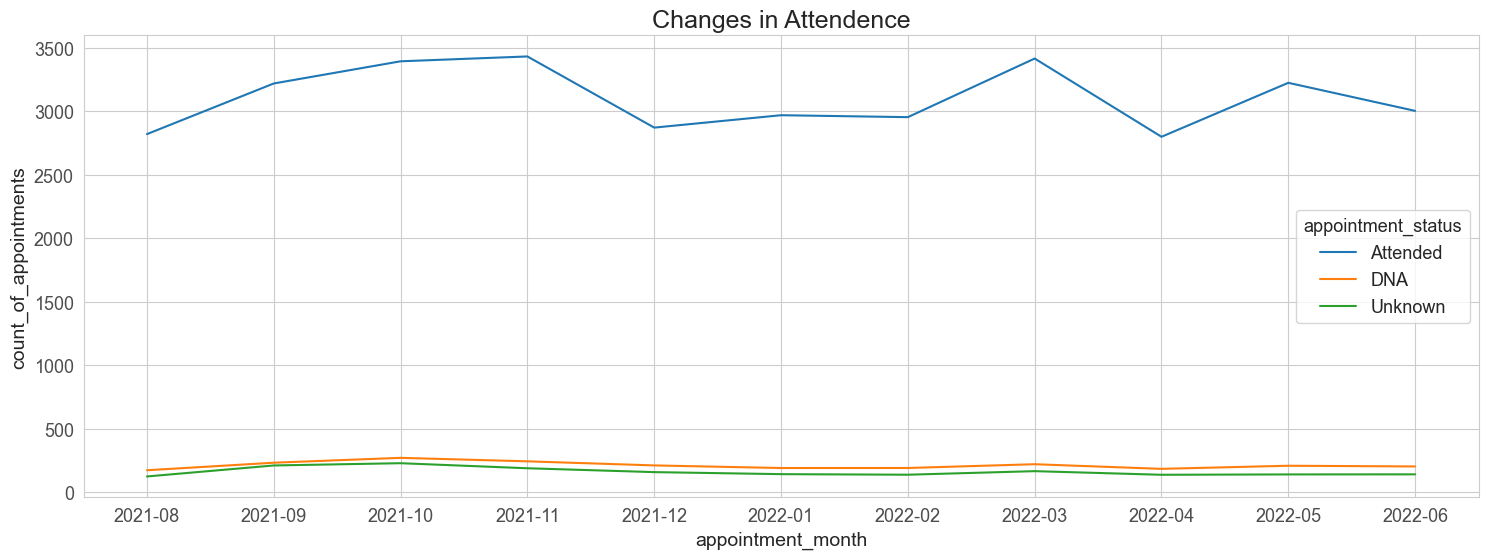

In [21]:
# Are there significant changes in whether or not visits are attended?

# Enlarge the plot size.
plt.figure(figsize=(18, 6))

# Plot the data.
sns.lineplot(x='appointment_month', y = 'count_of_appointments',\
             hue='appointment_status', data = ar_agg, ci=None).set_title('Changes in Attendence')

# Save the plot
plt.savefig('changes_in_attendence_over_time.png')

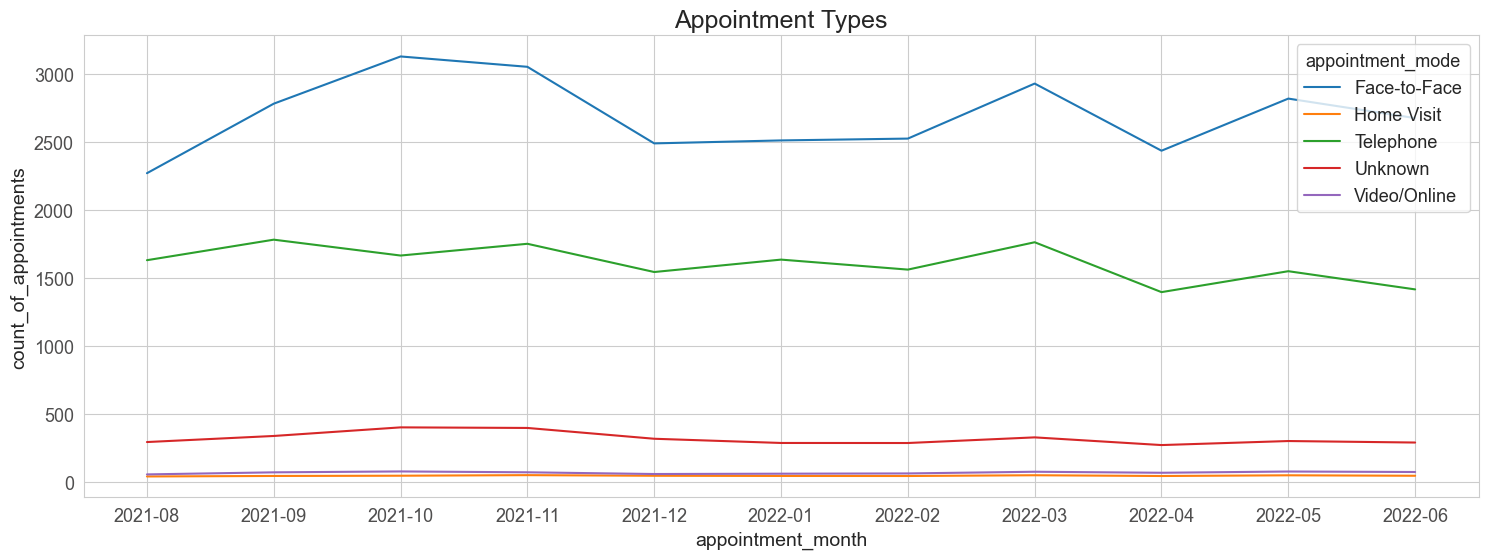

In [22]:
# Are there changes in terms of appointment type and busiest months?

# Enlarge the plot size.
plt.figure(figsize=(18, 6))

# Plot the data.
sns.lineplot(x='appointment_month', y ='count_of_appointments',\
             hue='appointment_mode', data = ar_agg, ci=None).set_title('Appointment Types')

# Save the plot
plt.savefig('appointment_type_over_time.png')

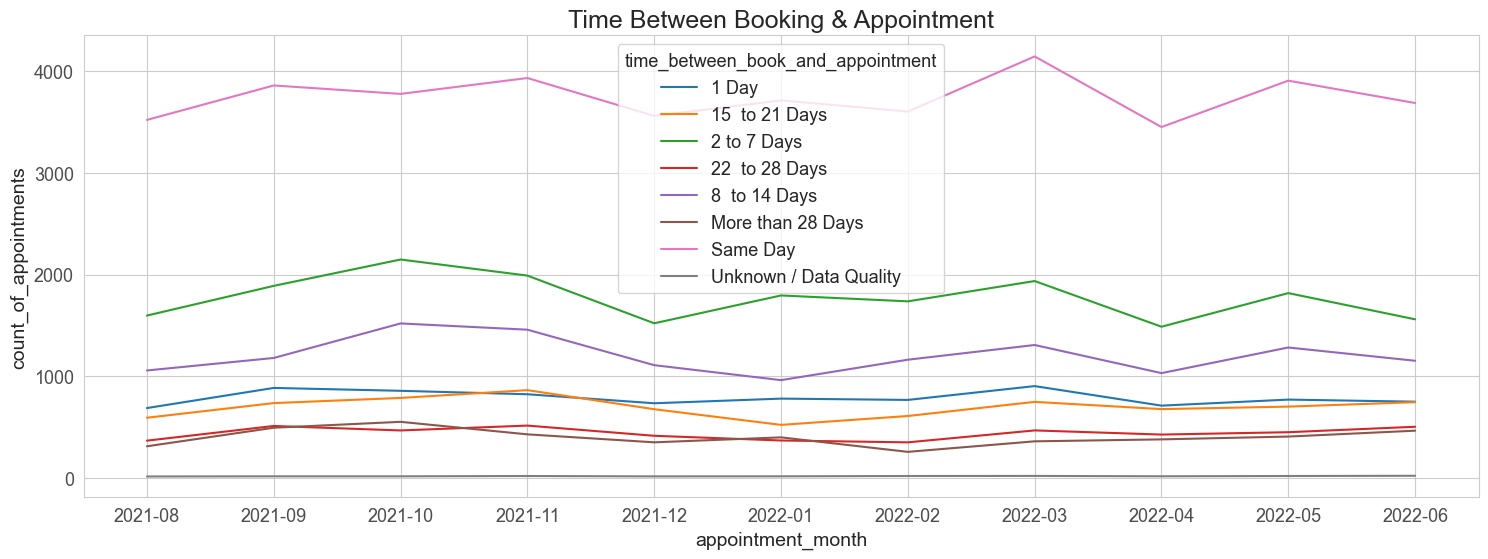

In [23]:
# Are there any trends in time between booking an appointment?

# Enlarge the plot size.
plt.figure(figsize=(18, 6))

# Plot the data.
sns.lineplot(x='appointment_month', y = 'count_of_appointments',\
             hue='time_between_book_and_appointment', data=ar_agg, ci=None).set_title('Time Between Booking & Appointment')

# Save the plot
plt.savefig('time_between.png')

### Visualisation, Part II: Monthly appointments
#### Investigation of Service Settings, Context Types and National Categories

In [31]:
# Change the data type of appointment_month to string for ease of visualization
nc['month_new'] = nc['appointment_month'].astype('string')

# Aggregate the appointments per month and determine the sum of the appointments per month
nc_ss = nc.groupby('month_new')[['service_setting']].size().reset_index()
nc_ss

,month_new,0
0,2021-08,69999
1,2021-09,74922
2,2021-10,74078
3,2021-11,77652
4,2021-12,72651
5,2022-01,71896
6,2022-02,71769
7,2022-03,82822
8,2022-04,70012
9,2022-05,77425


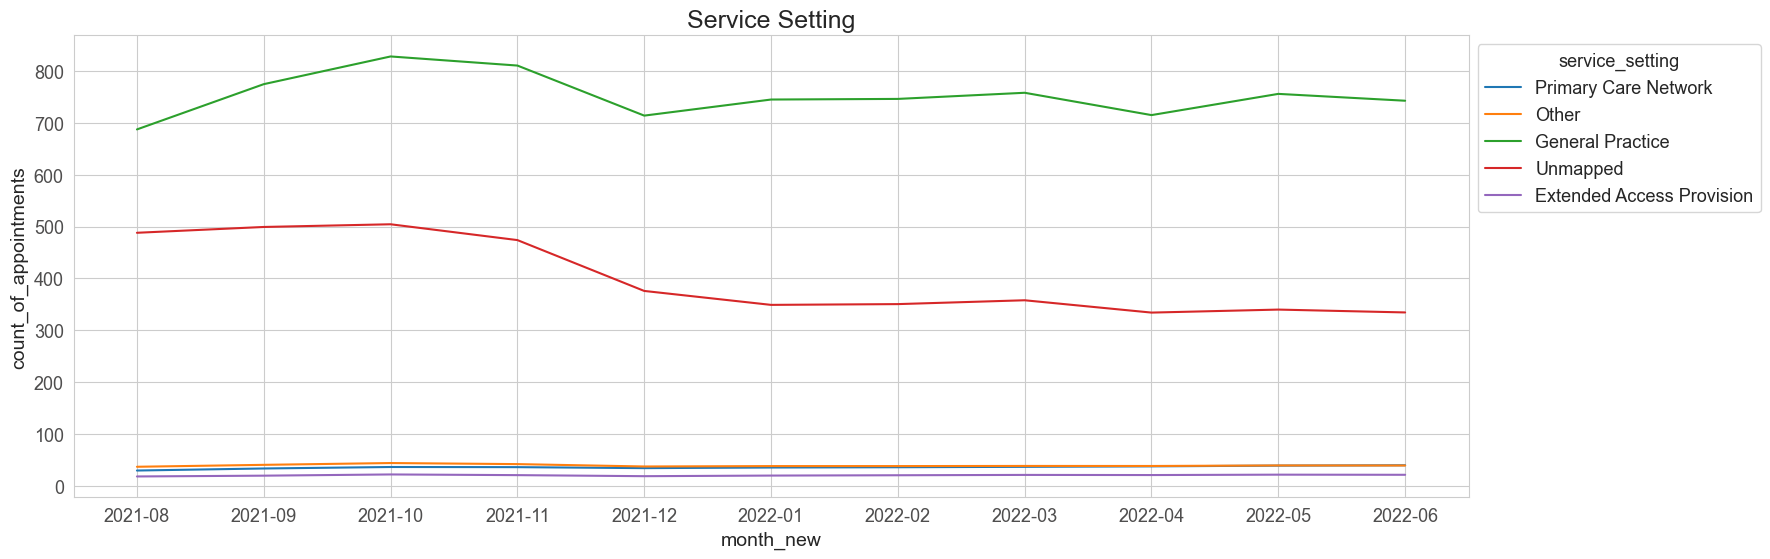

In [32]:
# Create Service Setting lineplot.

# Enlarge the plot.
plt.figure(figsize=(18, 6))

# Service setting.
ax = sns.lineplot(x= 'month_new', y= 'count_of_appointments', data=nc, hue='service_setting', ci=None)

# Move the legend.
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Give the plot a title.
ax.set_title('Service Setting')

# Save the plot.
plt.savefig('service_settings.png')

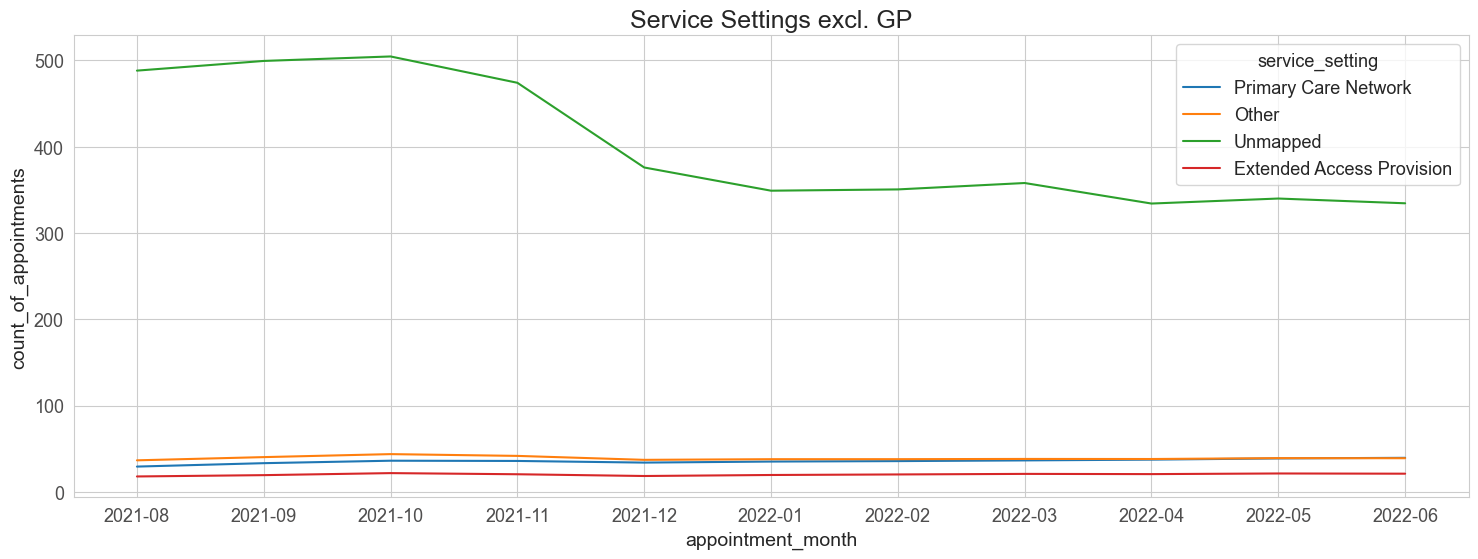

In [35]:
# Create a second visualisation concentrating on all the service settings excluding GP visits

nc_new3 = nc[~nc['service_setting'].str.contains('General Practice')]

# Enlarge the plot size.
plt.figure(figsize=(18, 6))

# Plot the data.
sns.lineplot(x = 'appointment_month', y= 'count_of_appointments', data=nc_new3, \
             hue= 'service_setting', ci=None).set_title('Service Settings excl. GP')

# Save the plot
plt.savefig('service_settings_excl_GP.png')

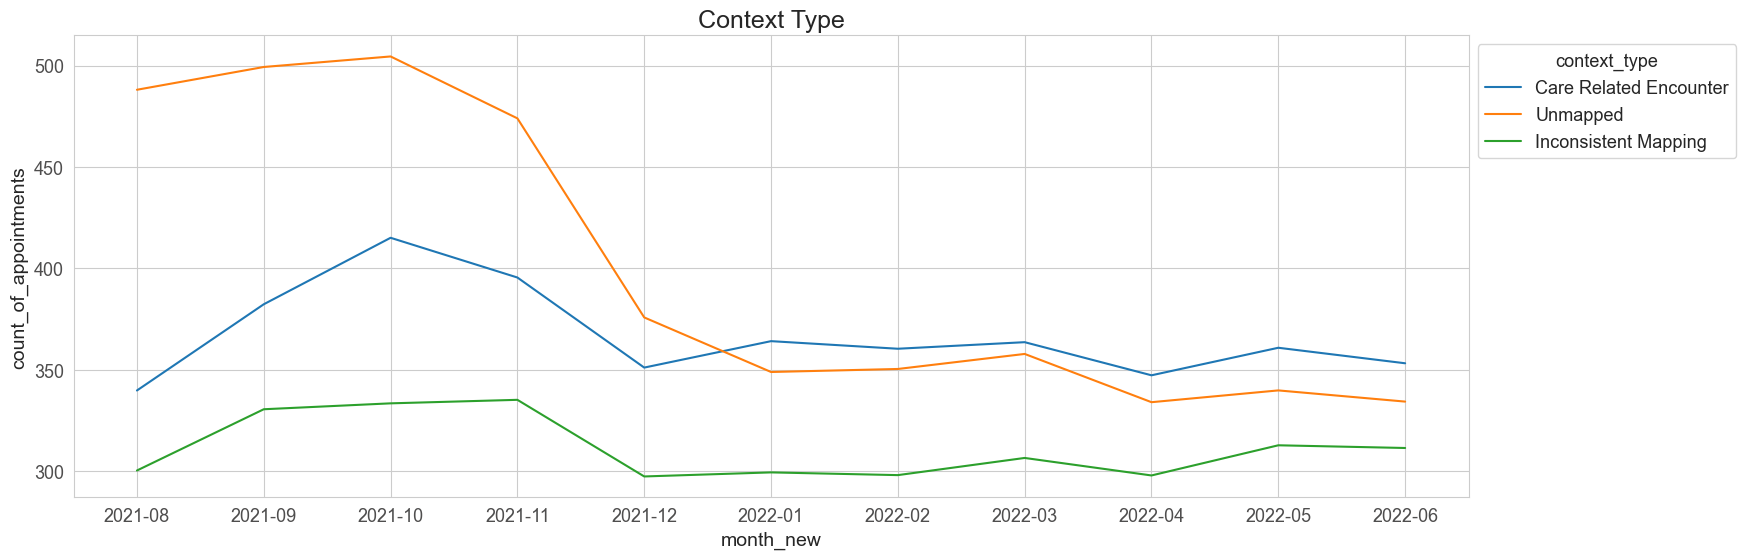

In [33]:
# Create Context Type lineplot.

nc_ct = nc.groupby('month_new')[['context_type']].size().reset_index()
nc_ct

# Enlarge the plot.
plt.figure(figsize=(18, 6))

ax1 = sns.lineplot(x= 'month_new', y= 'count_of_appointments', data= nc, hue='context_type', ci=None)

# Move the legend.
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))

# Give the plot a title.
ax1.set_title('Context Type')

# Save the plot.
plt.savefig('context_types.png')

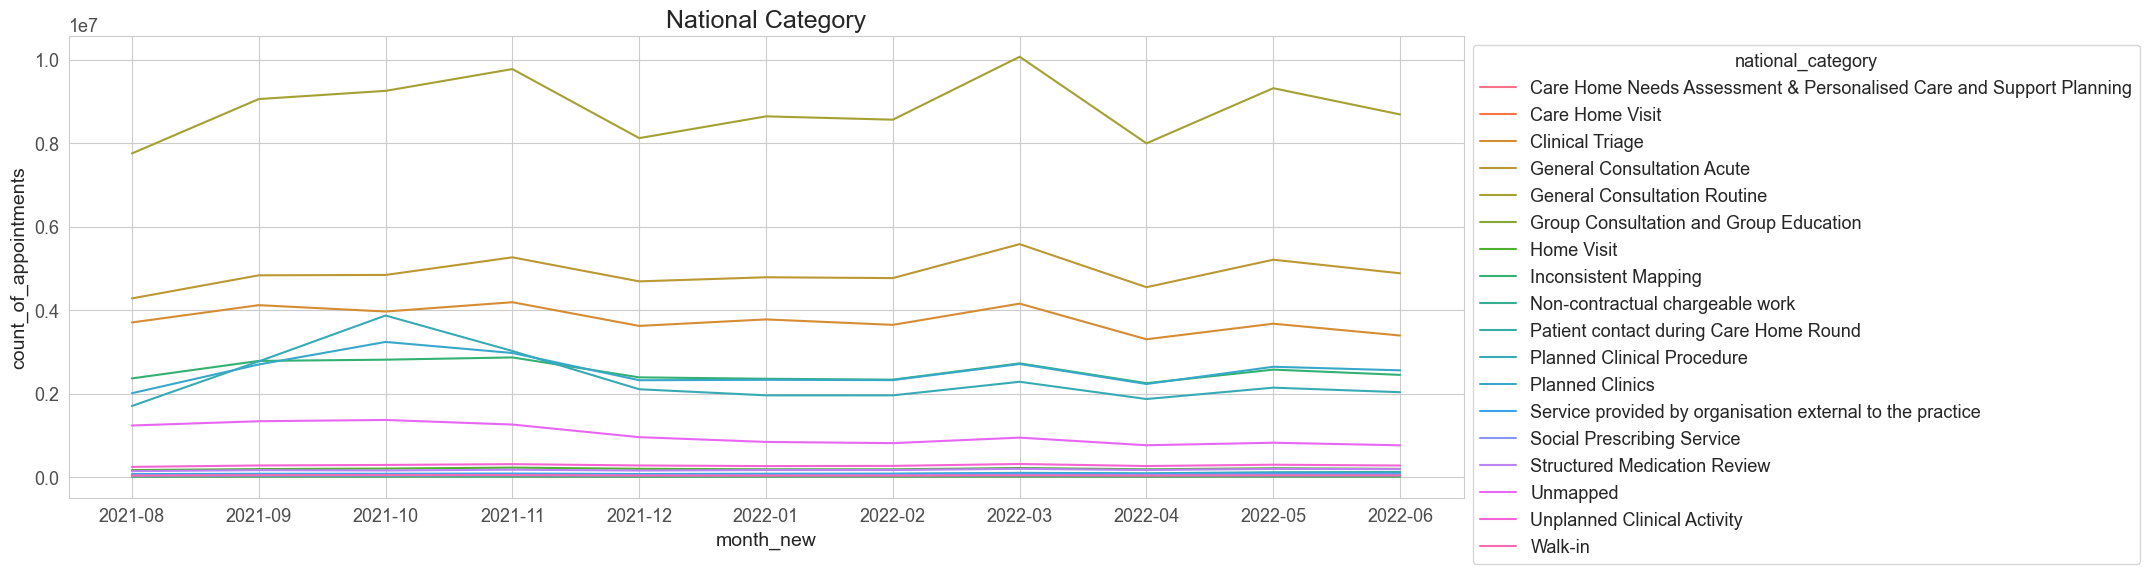

In [36]:
# Create Nataional Categories Type lineplot.

nc_nc = nc.groupby(['national_category','month_new']).sum().reset_index()
nc_nc

# Enlarge the plot.
plt.figure(figsize=(18, 6))

ax2 = sns.lineplot(x= 'month_new', y= 'count_of_appointments', data=nc_nc, hue='national_category', ci=None)

# Move the legend.
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))

# Give the plot a title.
ax2.set_title('National Category')

# Save the plot.
plt.savefig('national_categories.png')

### Visualisation, Part III: Seasonal analysis
##### The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).


In [37]:
# Create four visualisations indicating the number of appointments for service setting per season. 

# Aggregate the appointments per month and determine the sum of the records per season (specified month).

nc_ss_day = nc.groupby(['appointment_date','appointment_month','service_setting']).sum().reset_index()
nc_ss_day

,appointment_date,appointment_month,service_setting,count_of_appointments
0,2021-08-01,2021-08,Extended Access Provision,438
1,2021-08-01,2021-08,General Practice,3411
2,2021-08-01,2021-08,Other,401
3,2021-08-01,2021-08,Primary Care Network,323
4,2021-08-01,2021-08,Unmapped,1054
...,...,...,...,...
1665,2022-06-30,2022-06,Extended Access Provision,9163
1666,2022-06-30,2022-06,General Practice,1124374
1667,2022-06-30,2022-06,Other,23115
1668,2022-06-30,2022-06,Primary Care Network,34774


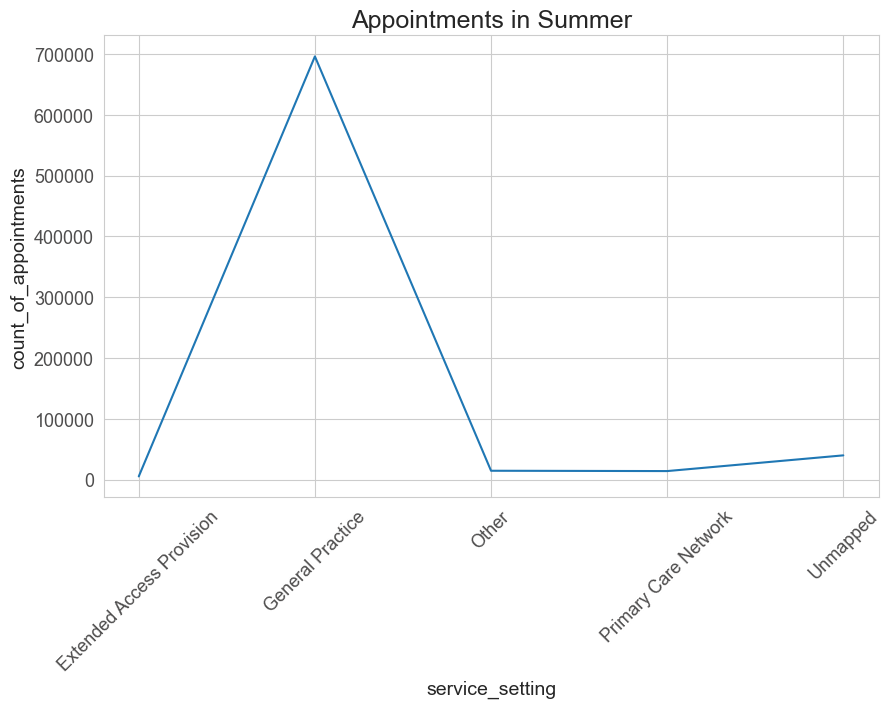

In [41]:
# Summer (August 2021)

# Enlarge the plot
plt.figure(figsize=(10, 6))

# create a lineplote with specific date
sns.lineplot(x="service_setting", y="count_of_appointments", data=nc_ss_day[nc_ss_day["appointment_month"]\
                                                                            == "2021-08"], \
             ci=None).set(title='Appointments in Summer')

plt.xticks(rotation=45)

# Save the plot
plt.savefig('appointments_in_summer.png')

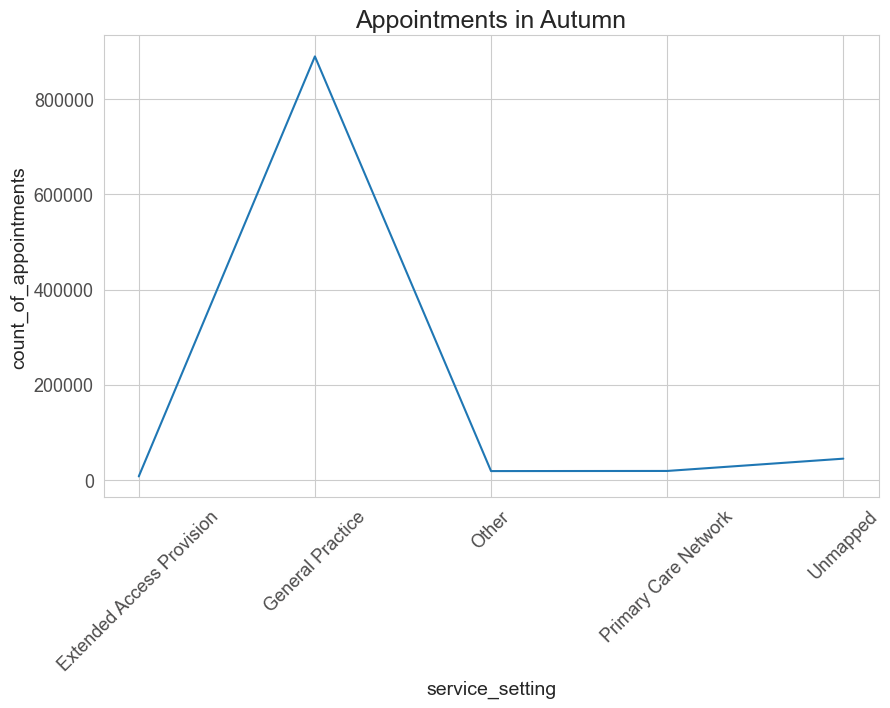

In [43]:
# Autumn - October 2021

# Enlarge the plot
plt.figure(figsize=(10, 6))

# create a lineplote with specific date
sns.lineplot(x="service_setting", y="count_of_appointments", data=nc_ss_day[nc_ss_day["appointment_month"]\
                                                                            == "2021-10"], ci=None)\
.set(title='Appointments in Autumn')

plt.xticks(rotation=45)

# Save the plot
plt.savefig('appointments_in_autumn.png')

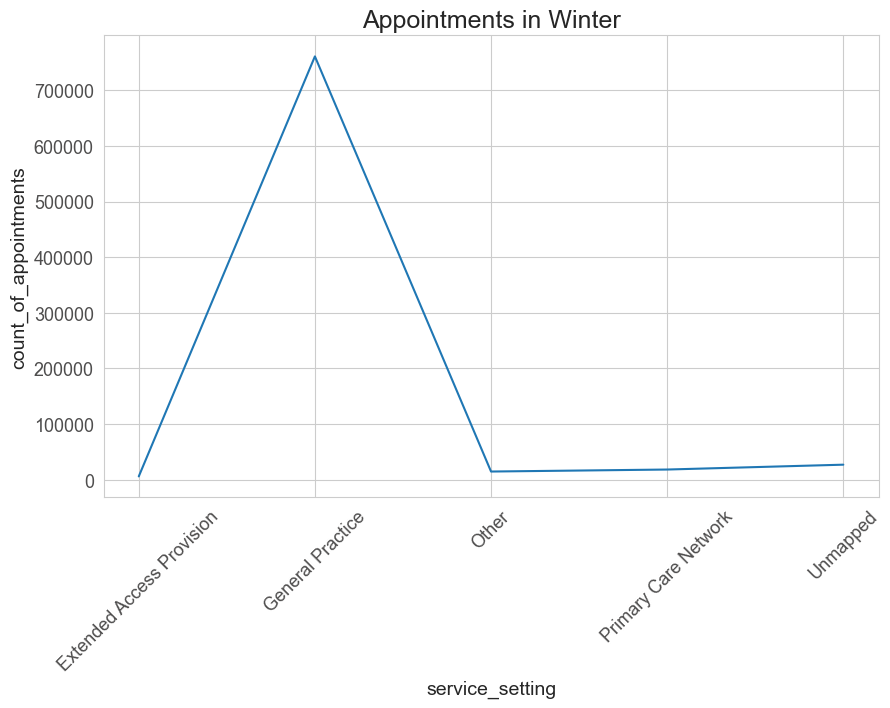

In [44]:
# Winter - January 2022

# Enlarge the plot
plt.figure(figsize=(10, 6))

# create a lineplote with specific date
sns.lineplot(x="service_setting", y="count_of_appointments", data=nc_ss_day[nc_ss_day["appointment_month"]\
                                                                            == "2022-01"], ci=None)\
.set(title='Appointments in Winter')

plt.xticks(rotation=45)

# Save the plot
plt.savefig('appointments_in_winter.png')

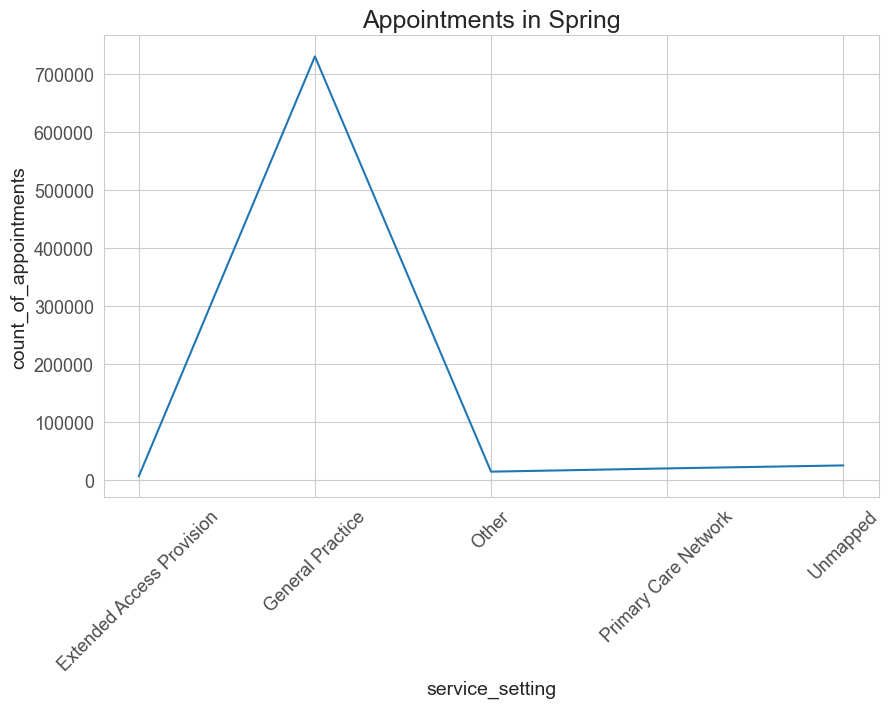

In [45]:
# Spring - April 2022

# Enlarge the plot
plt.figure(figsize=(10, 6))

# create a lineplote with specific date
sns.lineplot(x="service_setting", y="count_of_appointments", data=nc_ss_day[nc_ss_day["appointment_month"]\
                                                                            == "2022-04"], ci=None)\
.set(title='Appointments in Spring')

plt.xticks(rotation=45)

# Save the plot
plt.savefig('appointments_in_spring.png')

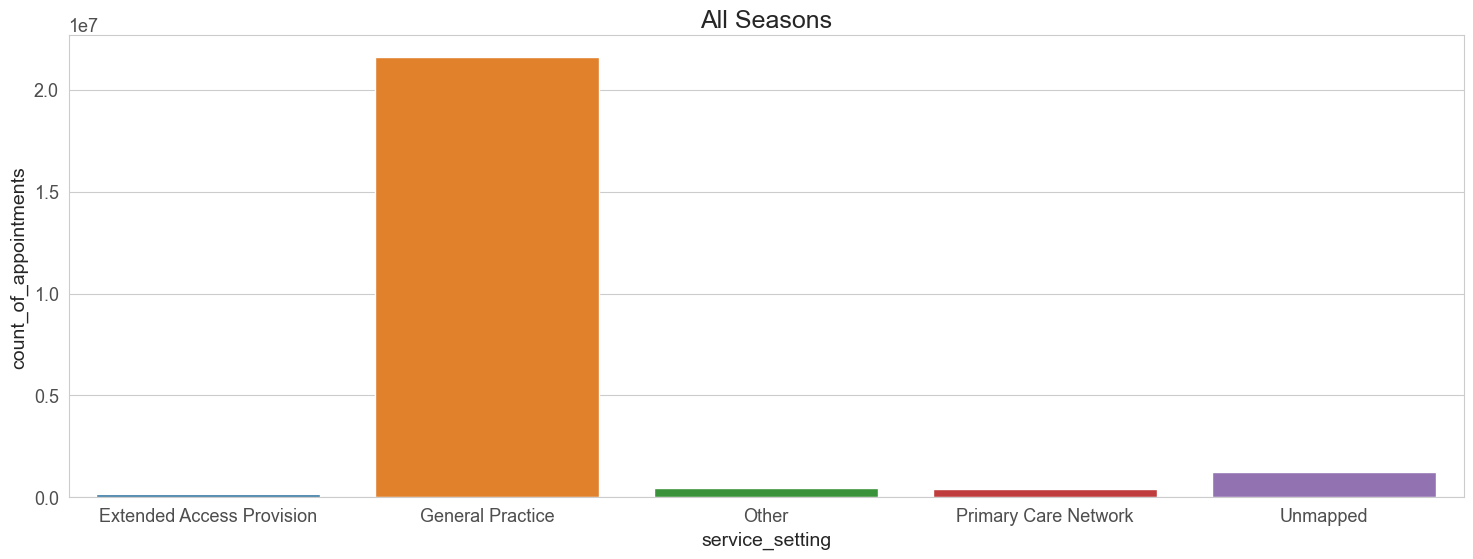

In [46]:
# All seasons.

# Enlarge the plot
plt.figure(figsize=(18, 6))

# create a lineplote with specific date
sns.barplot(x="service_setting", y="count_of_appointments", data=nc_ss_day[nc_ss_day["appointment_month"]\
                                                                            == "2021-08"], \
             estimator=sum,ci=None).set(title='All Seasons')

# Save the plot
plt.savefig('all_Seasons.png')

## Additional Analysis: Analysing Twitter Data

In [ ]:
# Set the figure size and plot style
sns.set(rc={'figure.figsize':(15,12)})
pd.options.display.max_colwidth=200

In [ ]:
# Load the tweets.csv file and create a new DataFrame

tweets = pd.read_csv("Tweets.csv")
tweets.head()
tweets.describe()
tweets.info()

In [ ]:
# Explore the tweet_retweet_count.

tweets['tweet_retweet_count'].value_counts()
tweets['tweet_retweet_count'].value_counts().head()

In [ ]:
# Explore the tweet_favorite_count.

tweets['tweet_favorite_count'].value_counts()
tweets['tweet_favorite_count'].value_counts().head()

In [ ]:
# Review the hashtags

# Create a new DataFrame (e.g. tweets_text) with only text values.

tweets_text = tweets['tweet_full_text'] 
tweets_text

In [ ]:
# Create a variable (tags,) and assign an empty list to it.

tags = []

# Use a for loop, and specify the iterator_variable and the sequence.

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())
            
# Create a Pandas Series to count the values in the list. Set the Series equal to tags.

series = pd.Series(tags).value_counts()

# Display the first 30 records.

series[0:31]

In [ ]:
# Identify the top trending hashtags with a visualisation.

#Convert the new Series into a DataFrame (e.g. data). Remember to reset the index.

new_df = pd.DataFrame(series).reset_index()

new_df

In [ ]:
# Rename the columns to word and count.

new_df.columns = ['word', 'count']

new_df

In [ ]:
# Create a Seaborn barplot of all records with a count>10.
# NOTE: 10 is too many records, I've changed it to 20

# Add a new column to identify records > 20

greater_than_10 = new_df['count']>=20

new_df['greater_than_10'] = greater_than_10

filtered_df = new_df[(new_df['greater_than_10'] ==True)]

filtered_df

In [ ]:
# Create the barplot

sns.barplot(x = 'word',
             y = 'count',
             data=filtered_df,
             hue ='word')

In [ ]:
# Remove any overrepresented hashtags and create a Seaborn barplot \
# displaying the remaining most frequently used hastags (#).

fig, ax = plt.subplots(figsize=(15, 12))

ax = sns.barplot(x = 'word',
             y = 'count',
             data=filtered_df[2:15],
             hue ='word',
           dodge=False,
           )

plt.xticks(rotation=90)
plt.show()

### Notes on the Twitter data analysis

An analysis of trending topics on Twitter was undertaken to gain a deeper insight into public sentiment about the NHS and to determine whether there has been a high volume of hashtags related to healthcare in the UK. Data (in the form of tweets) was scraped by searching the Twitter API, producing a list of 1174 tweets in the UK. Tweets were assessed for: 1) retweet counts, 2) favourite counts and 3) relevant hashtags, to gauge public reach and interaction. Most of the tweets scraped had little to no interaction in the form of retweets or favourites. #Healthcare and #Health were both highly common hashtags, with some healthcare-adjacent hashtags (e.g. #medicine) occurring at much lower rates. 

This suggests the data may not be very representative of the broader public. 

Tweets with hashtags (#) were isolated and analysed to find which were the most popular. By far the most popular hashtag was #healthcare, followed by #health, both outliers in the data. Removing these from the analysis and filtering to only those with more than 20 tweets produced a list of 15 hashtags. Of these, #medicine and #medical were ranked 2 and 5 respectively. #pharmaceutical, #digitalhealth, #pharma, #medtwitter, #biotech and #meded were the only other healthcare-related hashtags that emerged from the analysis.

It is clear that there is a trend of healthcare because of the high occurrence of the hashtags #Healthcare and #health, but it remains unclear as to how this impacts the NHS. There may be further opportunities to explore in this domain. 
